# PCA

#### Proof that in general the matrix $D$ is given by the $l$ eigenvectors corresponding to the largest eigenvalues.
From lecture we know that:
$ D^* = \arg\min_D \sqrt{\sum_{i,j}{(x_j^i-r(x^i)_j)^2}}$ <br>
$D^TD=1/l$ <br>
<br>
with $l=1$ we get: <br>
$D = (d_1,d_2,...d_n)^T = d$ <br>
$d^*=argmin_d \sum_i{ ||x^i-d(d^Tx^i)||^2} = argmax_d Tr(d^Tx^Txd) $

$l-1 \rightarrow l$: <br>


Starting from:

\begin{align}
D^* &= \underset{D}{arg\max}\;Tr\ (D^TX^TXD)\\
&= \underset{D}{arg\max}\left[Tr\ (D_{l-1}^TX^TXD_{l-1}) + d^{(l)T}X^TXd^{(l)}\right]
\end{align}


Where we used the notation $D_k$ to denote the matrix with first $l−1$ columns of $D$

The 2 summands in the expression share no common terms of $D$
and hence can be maximized independently adhering to the constraints $D_{l−1}$ has orthonormal columns and $d^{(l)}$ is unit norm and orthogonal to all columns of $D_{l−1}$

Using the induction hypothesis, we conclude that $Tr\ (D_{l-1}^TX^TXD_{l-1})$
(with the constraint that the columns of $D_{l−1}$ are orthonormal) is maximized when $D_{l−1}$ comprises of the orthonormal eigenvectors corresponding the $l−1$ largest eigenvalues.

Notation: Suppose $λ_1⩾...⩾λ_n$
are the eigenvalues and $v_1,...,v_n$ are the corresponding orthonormal eigenvectors.
Denote $H_{l-1} = span\{v_1, ...,v_{l-1}\}$ and $H^⊥_{l−1}$ the orthogonal subspace of $H_{l-1}$ i.e. $H^⊥_{l−1}=span\{v_l,...,v_n\}$

**Lemma**:

\begin{align}
\lambda_l &= \underset{d^{(l)}}{max}\ d^{(l)T}X^TXd^{(l)} \qquad \text{s.t.} \quad \Vert d^{(l)}\Vert = 1, d^{(l)} \in H_{l-1}^\bot \\
          &=v_l^TX^TXv_l
\end{align}

**Proof**:

Let $\Sigma = X^TX$.
Because it's a symmetric positive semi-definite matrix, eigendecomposition exists and let it be $\Sigma = V\Lambda V^T$, where columns of $V$ are $v_1,...,v_n$ in that order and hence $\Lambda=diag(\lambda_1,...,\lambda_n)$.

\begin{align}{2}
d^{(l)T}\Sigma d^{(l)} &= d^{(l)T} V\Lambda V^T d^{(l)}\\
&= q^T \Lambda\ q \qquad &&(\text{where } q = V^Td^{(l)})\\
&= \sum_{i=1}^n q_i^2 \lambda_i \qquad &&(\text{where } q_i = (V^Td^{(l)})_i = v_i^T d^{(l)})\\
&= \sum_{i=l}^n q_i^2 \lambda_i \qquad &&(\text{because } d^{(l)} \in H_{l-1}^\bot \implies q_i = v_i^T d^{(l)} = 0\ \forall i < l)\\
\end{align}

Now,

\begin{align}{2}
\sum_{i=l}^n q_i^2 \lambda_i &= \sum_{i=1}^n q_i^2 \lambda_i = \Vert q \Vert = \Vert V^T d^{(l)} \Vert \\
&= \Vert d^{(l)} \Vert \qquad &&(\text{because } V\ and\ hence\ V^T is\ orthogonal) \\
&= 1 \qquad \quad\ &&(\text{because } \Vert d^{(l)} \Vert = 1)
\end{align}

Therefore $d^{(l)T} \Sigma d^{(l)}$
is a convex combination of $λ_l,...,λ_n$ and
$\underset{d^{(l)}}{max}\ d^{(l)T}\Sigma d^{(l)} = \underset{d^{(l)}}{max}\ d^{(l)T}X^TXd^{(l)} = v_l^TX^TXv_l = \lambda_l \qquad \square$

We finally conclude that $D^∗$
is obtained by augmenting $D_{l−1}$ with the column $v_l$ which completes the original proof.

#### Generate a numerical example to compare a data transformation implemented from scratch with the PCA implementation from sklearn.

First we visualize the transformation from the sklearn implementation as shown in the lecture.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


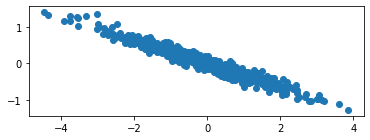

In [30]:
#generating a data set
mu, sigma1, sigma2 = 0, 0.1, 1.4 # mean and standard deviation
s1 = np.random.normal(mu, sigma1, 500)
s2 = np.random.normal(mu, sigma2, 500)

alpha = -2.*np.pi*0.2

x=s1*np.cos(alpha)+s2*np.sin(alpha)
y=-s1*np.sin(alpha)+s2*np.cos(alpha)

X = np.transpose([x,y])

plt.scatter(x,y)
plt.axes().set_aspect('equal')
plt.show()

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


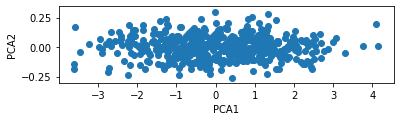

In [17]:
Xt = pca.transform(X)
plt.scatter(Xt[:,0],Xt[:,1])
plt.axes().set_aspect(3)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [18]:
# Covariance matrices
print(np.cov(X.T))
print(np.cov(Xt.T))

[[ 1.73378756 -0.55606253]
 [-0.55606253  0.18856697]]
[[1.91308703e+00 7.74263753e-17]
 [7.74263753e-17 9.26749689e-03]]


Now the implementation from scratch

Covariance of own implementation:
[[2.08572558e+00 3.11485418e-17]
 [3.11485418e-17 1.05557751e-02]]
Covariance of Sklearn implementation:
[[1.91308703e+00 7.74263753e-17]
 [7.74263753e-17 9.26749689e-03]]
4.071349093519928 0.019296532130970653


C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


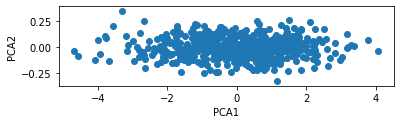

In [42]:
#get the covariance matrix
cov = np.cov(X.T)/X.shape[0]

#calculating eigenvalues and vectors from covariance matrix
w, v = np.linalg.eig(cov)

#sorting for the largest eigenvalue
index=w.argsort()[::-1]
v= v[:,index]

#multiplying the original data with the eigenvectors to transform the data
X_transformed= X.dot(v)

#plotting the transformed data

plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.axes().set_aspect(3)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
print("Covariance of own implementation:")
print(np.cov(X_transformed.T))
print("Covariance of Sklearn implementation:")
print(np.cov(Xt.T))

from sklearn.metrics import mean_squared_error
mse_0 = mean_squared_error(X_transformed[:,0], Xt[:,0])
mse_1 = mean_squared_error(X_transformed[:,1], Xt[:,1])

print(mse_0, mse_1)

We can see from the plots that we get similar results from both implementations. However the off-diagonal elements in the transformed covariance matrices differ.
Furthemore we see that the mean squared error between the columns of the transformed matrices is very small, so overall the two implementations indeed produce similar results.